<a href="https://colab.research.google.com/github/vinithashri-s/flood-detection-using-ML/blob/main/flooddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
num_days = 365
dates = pd.date_range(start='2024-01-01', periods=num_days, freq='D')
rainfall_mm = np.random.gamma(2, 20, num_days)
drainage_efficiency = np.random.uniform(3, 9, num_days)

rainfall_status = pd.cut(rainfall_mm, bins=[0, 20, 50, 1000], labels=["Light", "Moderate", "Heavy"])

In [4]:
flood_risk_score = (rainfall_mm / 10) * 0.5 + (10 - drainage_efficiency) * 0.5
flood_occurrence = np.where(flood_risk_score > 4.5, "Yes", "No")


In [5]:
data = pd.DataFrame({
    "Date": dates,
    "Rainfall_mm": rainfall_mm,
    "Drainage_Efficiency": drainage_efficiency,
    "Rainfall_Status": rainfall_status,
    "Flood_Occurrence": flood_occurrence
})

In [6]:
total_days = len(data)
flood_days = (data["Flood_Occurrence"] == "Yes").sum()
heavy_rain_days = (data["Rainfall_Status"] == "Heavy").sum()
flood_percent = (flood_days / total_days) * 100

/tmp/ipython-input-287357400.py:11: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


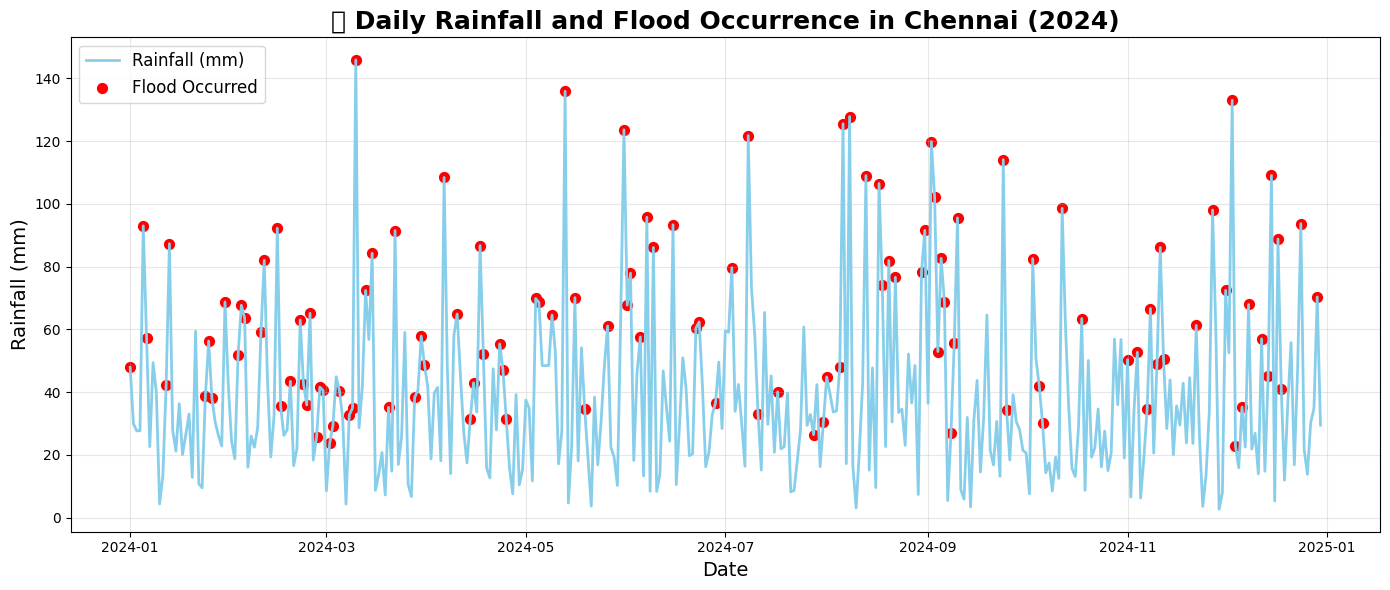

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Rainfall_mm"], color="skyblue", linewidth=2, label="Rainfall (mm)")
plt.scatter(data.loc[data["Flood_Occurrence"]=="Yes", "Date"],
            data.loc[data["Flood_Occurrence"]=="Yes", "Rainfall_mm"],
            color="red", label="Flood Occurred", s=50)
plt.title("🌧️ Daily Rainfall and Flood Occurrence in Chennai (2024)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rainfall (mm)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3487800111.py:8: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


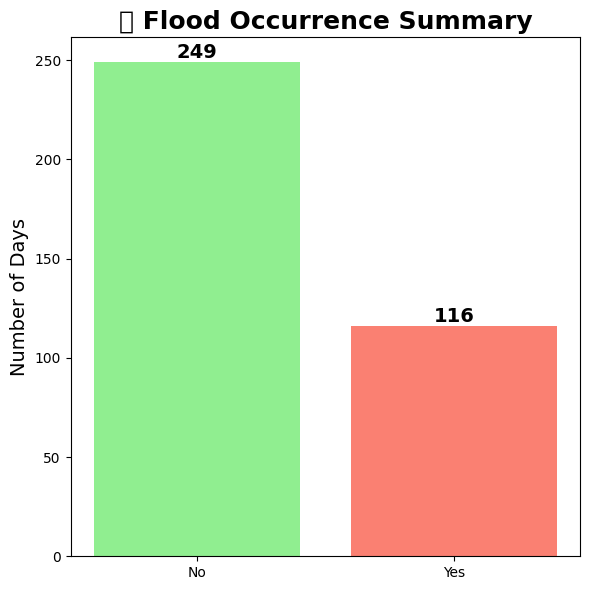

In [8]:
plt.figure(figsize=(6, 6))
counts = data["Flood_Occurrence"].value_counts()
plt.bar(counts.index, counts.values, color=["lightgreen", "salmon"])
plt.title("🌊 Flood Occurrence Summary", fontsize=18, fontweight='bold')
plt.ylabel("Number of Days", fontsize=14)
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

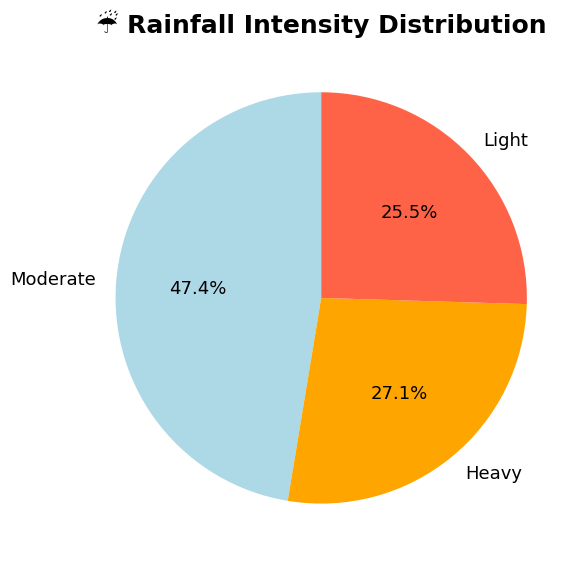

In [9]:
plt.figure(figsize=(6, 6))
rainfall_counts = data["Rainfall_Status"].value_counts()
plt.pie(rainfall_counts, labels=rainfall_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'orange', 'tomato'], textprops={'fontsize': 13})
plt.title("☔ Rainfall Intensity Distribution", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
print("\n" + "="*60)
print(" FLOOD DETECTION SUMMARY FOR CHENNAI (2024)")
print("="*60)
print(f" Total Days Recorded: {total_days}")
print(f" Heavy Rainfall Days: {heavy_rain_days}")
print(f" Flood Occurrence Days: {flood_days}")
print(f" Flood Likelihood: {flood_percent:.2f}%")
print("\n Interpretation:")
if flood_percent > 15:
    print("High risk of flooding — heavy rainfall and poor drainage are key factors.")
elif flood_percent > 5:
    print("Moderate risk — occasional floods during intense rainfall.")
else:
    print("Low risk — rainfall mostly within safe limits.")
print("="*60)


 FLOOD DETECTION SUMMARY FOR CHENNAI (2024)
 Total Days Recorded: 365
 Heavy Rainfall Days: 99
 Flood Occurrence Days: 116
 Flood Likelihood: 31.78%

 Interpretation:
High risk of flooding — heavy rainfall and poor drainage are key factors.
